In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Import the sataset
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [3]:
# Implementing Tompson Sampling
import random
N = 10000
d = 10
ads_selected = []

# Step 1. At each round n, considertwo numbers for each ad i:
# the nuber of times the ad i got reward 1 up to round m
numbers_of_rewards_1 = [0] * d
# the nuber of times the ad i got reward 0 up to round m
numbers_of_rewards_0 = [0] * d

# Step 2. For each ad i, take a round draw from the disribution
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad = i
            
    # Step 3. Select the ad that has the highest theta
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
    total_reward += reward

In [4]:
print("numbers_of_rewards_1: ", numbers_of_rewards_1)
print("numbers_of_rewards_0: ", numbers_of_rewards_0)
print("total_reward: ", total_reward)

numbers_of_rewards_1:  [14, 8, 0, 2, 2480, 0, 5, 94, 8, 0]
numbers_of_rewards_0:  [79, 67, 25, 38, 6709, 23, 41, 327, 54, 26]
total_reward:  2611


Text(0, 0.5, 'Number of times each ad was selected')

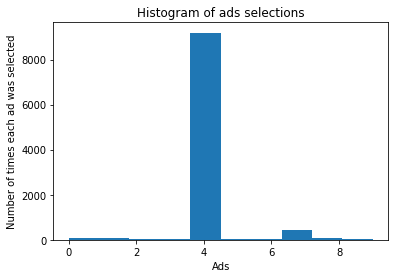

In [5]:
# Visualising the results
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")